In [1]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 523.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 16.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 28.5 MB/s eta 0:00:0000:0100:01


In [2]:
pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0 --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com, https://download.pytorch.org/whl/cu113
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 GB 468.3 kB/s eta 0:00:000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 52.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 72.3 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1
    Uninstalling torch-1.13.1:
      Successfully uninstalled torch-1.13.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from Esn import ESN 
import pandas as pd

In [3]:
df=pd.read_csv("value.csv")
target=pd.read_csv("target.csv")
df

,Unnamed: 0,Date,Volume,nasdak,sp
0,0,2004-01-02,1014545,2006.680054,1108.479980
1,1,2004-01-05,685130,2047.359985,1122.219971
2,2,2004-01-06,582520,2057.370117,1123.670044
3,3,2004-01-07,970955,2077.679932,1126.329956
4,4,2004-01-08,697725,2100.250000,1131.920044
...,...,...,...,...,...
4556,4556,2023-02-10,1575905,11718.120117,4090.459961
4557,4557,2023-02-13,1412939,11891.790039,4137.290039
4558,4558,2023-02-14,1308899,11960.150391,4136.129883
4559,4559,2023-02-15,745937,12070.589844,4147.600098


In [4]:
df=df['Date']
df


0       2004-01-02
1       2004-01-05
2       2004-01-06
3       2004-01-07
4       2004-01-08
           ...    
4556    2023-02-10
4557    2023-02-13
4558    2023-02-14
4559    2023-02-15
4560    2023-02-16
Name: Date, Length: 4561, dtype: object

In [7]:
target=target['Change']

In [8]:
len(target)

4561

Computing spectral radius...
done.
tensor([-0.0165], dtype=torch.float64)


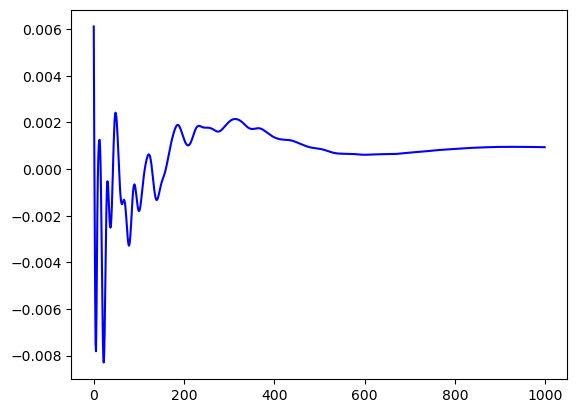

In [11]:
e=ESN(1,1000)
e.fit(np.array(target[:3561]).T)
data=e.predict(1000)
plt.plot(np.array(data.T),'b')
#plt.plot(np.array(target[3562:]),'r')

Computing spectral radius...
done.
tensor([0.3077], dtype=torch.float64)


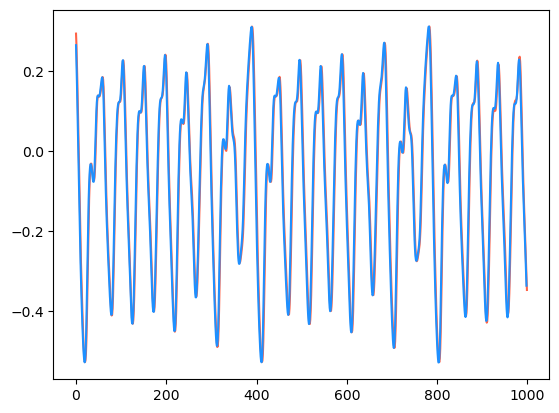

In [6]:
data = np.loadtxt('MackeyGlass_t17.txt')
esn=ESN(1,1000)
esn.fit(data[:1000])
pred=esn.predict(1000)
#print(pred)
plt.plot(np.array(pred.T),'#ff6347')
plt.plot(data[1001:2000],'#1e90ff')
plt.show()